### Notebook to visualize error rates of XGBoost classification

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
import os
import matplotlib.pyplot as plt
import pickle

In [2]:
def get_scores(responses_dict_l, chat_gpt_scores_dict_l, scale_to_generate):
    gad_scores = []
    phq_scores = []
    chatgpt_scores = []
    for key in responses_dict_l:
        phq_responses = responses_dict_l[key][0]
        gad_responses = responses_dict_l[key][1]
        chatgpt_responses = chat_gpt_scores_dict_l[key]
        if(scale_to_generate == "phq"):
            assert(len(phq_responses) == len(chatgpt_responses))
        else:
            assert(len(gad_responses) == len(chatgpt_responses))
        # print(chatgpt_responses)
        gad_score = sum(gad_responses)
        phq_score = sum(phq_responses)
        chatgpt_score = sum(chatgpt_responses)
        gad_scores.append(gad_score)
        phq_scores.append(phq_score)
        chatgpt_scores.append(chatgpt_score)
    return phq_scores, gad_scores, chatgpt_scores

In [5]:
drive_base = "../"

In [6]:
with open(drive_base + "outputs/gpt-4-phq-given-gad", 'rb') as file:
        chat_gpt_scores_dict_phq = pickle.load(file)

with open(drive_base + "outputs/gpt-4-gad-given-phq", 'rb') as file:
        chat_gpt_scores_dict_gad = pickle.load(file)

with open(drive_base + "outputs/responses_gad_phq", 'rb') as file:
        original_data = pickle.load(file)

with open(drive_base + "outputs/gpt-4-phq-given-gad-demographics", 'rb') as file:
        chat_gpt_scores_dict_phq_demo = pickle.load(file)

with open(drive_base + "outputs/gpt-4-gad-given-phq-demographics", 'rb') as file:
        chat_gpt_scores_dict_gad_demo = pickle.load(file)

In [7]:
gad_scores = []
phq_scores = []
gpt_scores_gad = []
gpt_scores_phq = []
gpt_scores_phq_demo = []
gpt_scores_gad_demo = []
for key in original_data:
    phq_responses = original_data[key]['phq']
    gad_responses = original_data[key]['gad']
    gpt_responses_gad = chat_gpt_scores_dict_gad[key]
    gpt_responses_gad_demo = chat_gpt_scores_dict_gad_demo[key]
    gpt_responses_phq = chat_gpt_scores_dict_phq[key]
    gpt_responses_phq_demo = chat_gpt_scores_dict_phq_demo[key]

    gad_scores.append(sum(gad_responses))
    phq_scores.append(sum(phq_responses))
    gpt_scores_gad.append(sum(gpt_responses_gad))
    gpt_scores_phq.append(sum(gpt_responses_phq))
    gpt_scores_phq_demo.append(sum(gpt_responses_phq_demo))
    gpt_scores_gad_demo.append(sum(gpt_responses_gad_demo))


In [14]:
# function to plot error_rates of points over 100 stratified runs of the XG Boost model. The more opaque the point is higher the error rate.

def error_scatter_plots(original_data, label_, gpt):
    gad_scores = []
    phq_scores = []
    dict_keys = []
    for key in original_data:
        phq_responses = original_data[key]['phq']
        gad_responses = original_data[key]['gad']
        gad_scores.append(sum(gad_responses))
        phq_scores.append(sum(phq_responses))
        dict_keys.append(key)
    week = 2
    label = label_
    extra_path = ''
    if gpt == "gpt":
        extra_path = "GPT"
    else:
        extra_path = "Default"

    for split in [5, 6, 7, 8, 9, 10]:
        file_path = drive_base + f"DepreST-CAT-main/machineLearning/errorDictXGBoost{extra_path}/errorDict" + str(week) + "week" + label + "split" + str(split) + ".pkl"
        with open(file_path, 'rb') as file:
            error_dict = pickle.load(file)

        intensity = []
        for key in dict_keys:
            if key in error_dict:
                intensity.append(error_dict[key])
            else:
                intensity.append(0)

        if(label == "phq9"):
            model = "Depression"
            x  = phq_scores
            x_name = "PHQ-9 score"
            y_name = "GAD-7 score"
            y = gad_scores
        else:
            model = "Anxiety"
            x  = gad_scores
            x_name = "GAD-7 score"
            y_name = "PHQ-9 score"
            y =  phq_scores

        z = intensity
        scaled_z = (z - np.min(z)) / (np.max(z) - np.min(z))


        plt.figure(figsize=(8, 6))
        plt.scatter(x, y, s=100, c='blue', alpha=scaled_z)  # Set the alpha based on z
        plt.title(f"{model} screening model performance for {split}")
        plt.xlabel(x_name)
        plt.ylabel(y_name)
        plt.grid(True)
        plt.show()

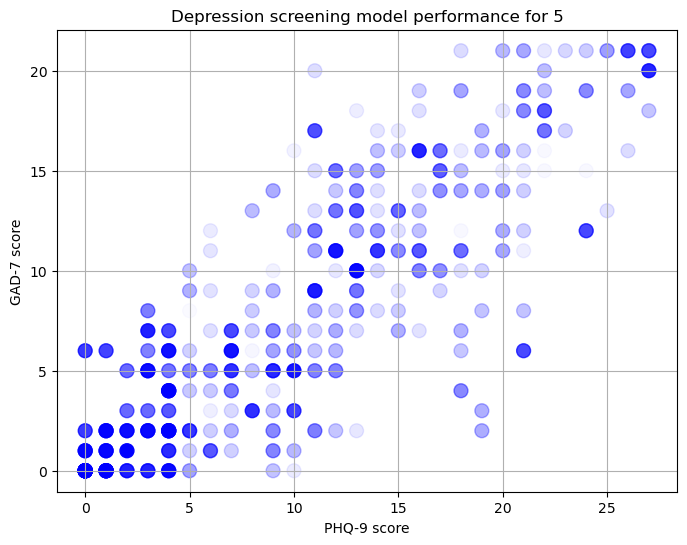

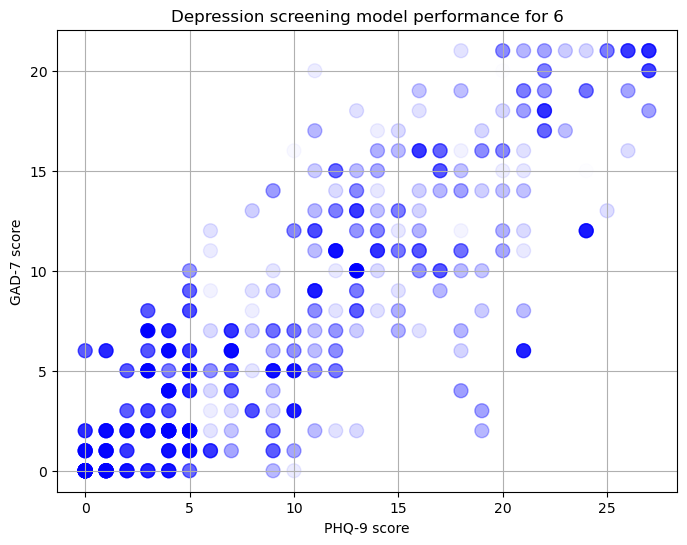

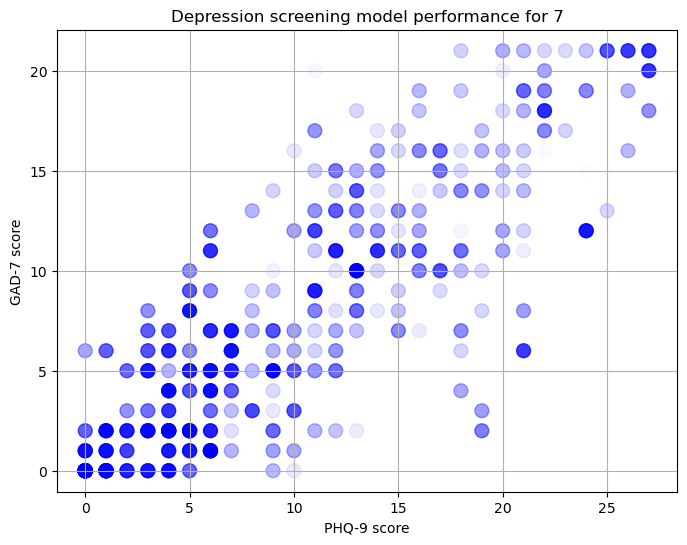

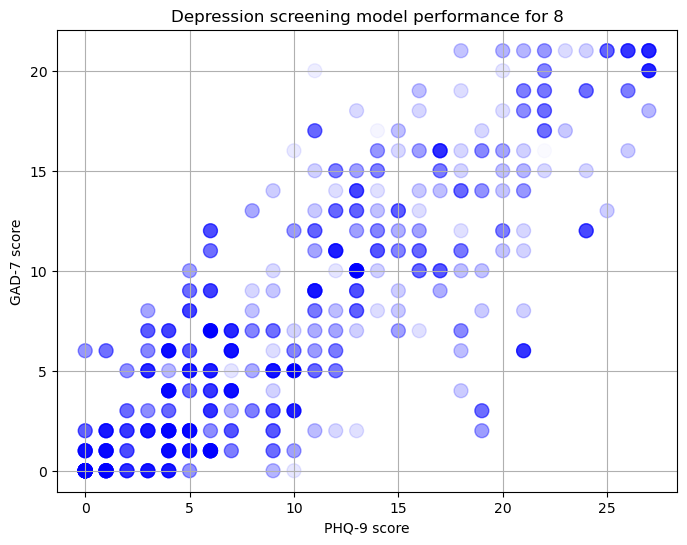

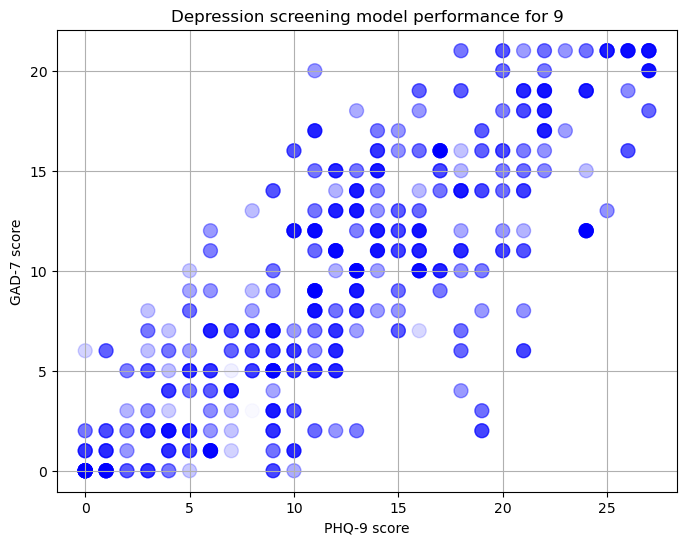

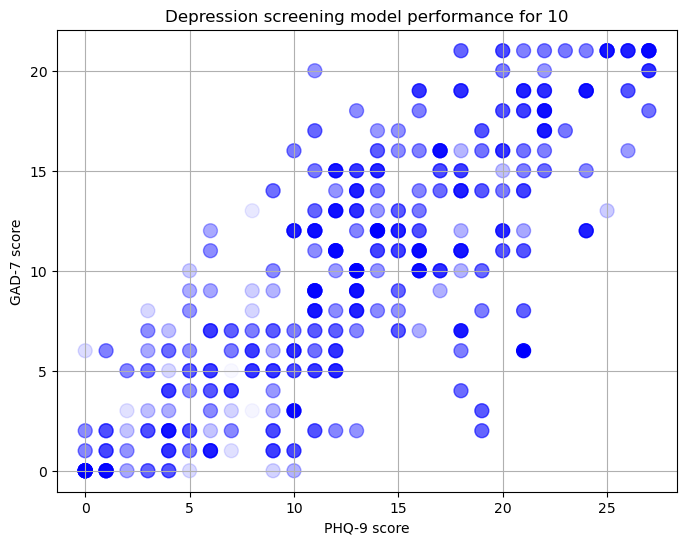

In [15]:
error_scatter_plots(original_data, "phq9", "gpt")

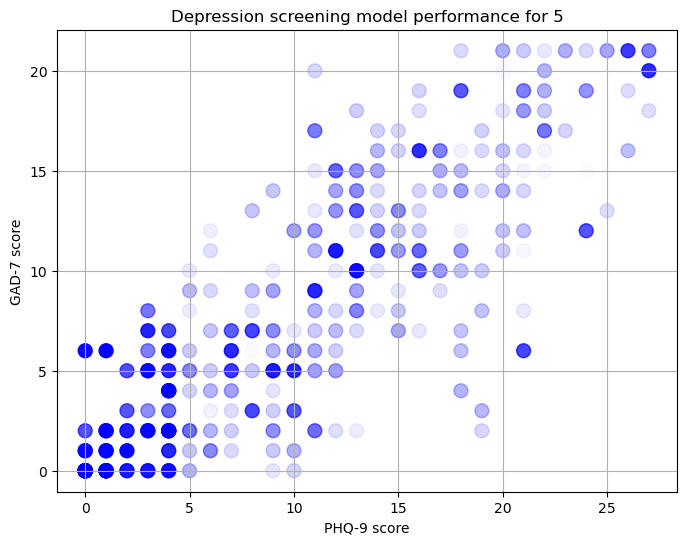

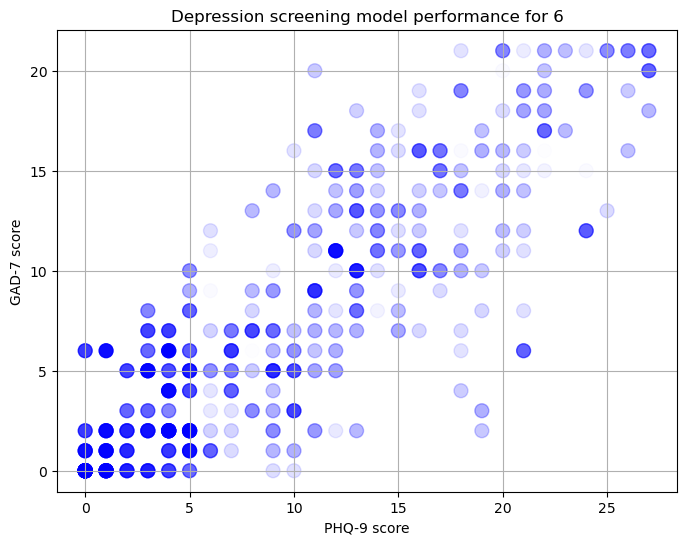

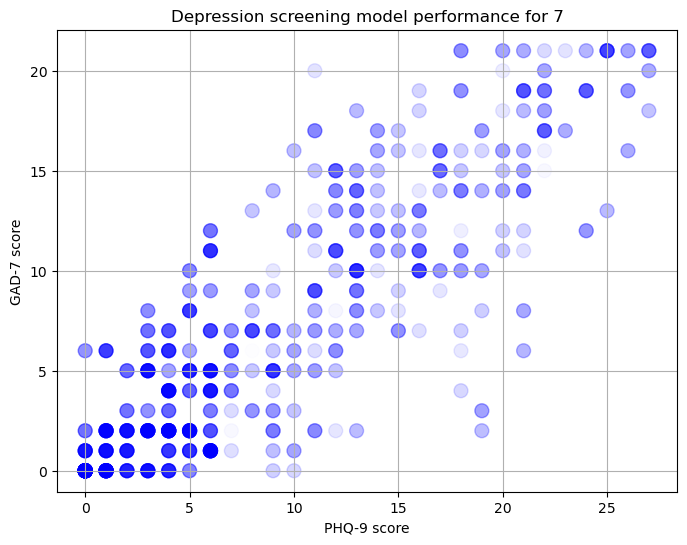

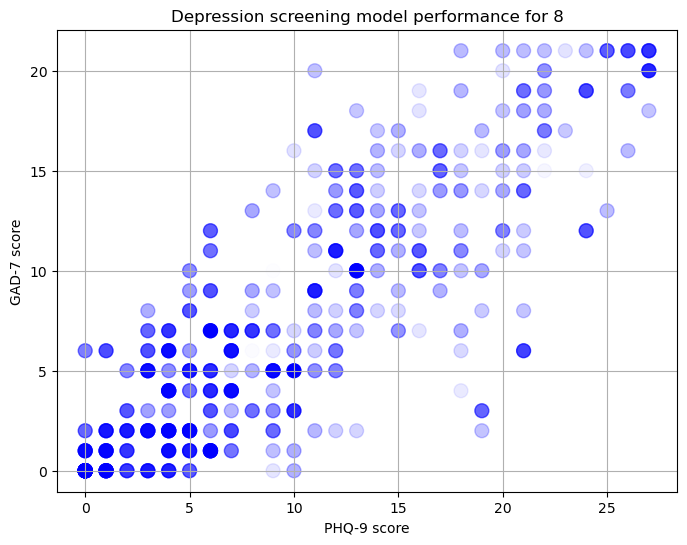

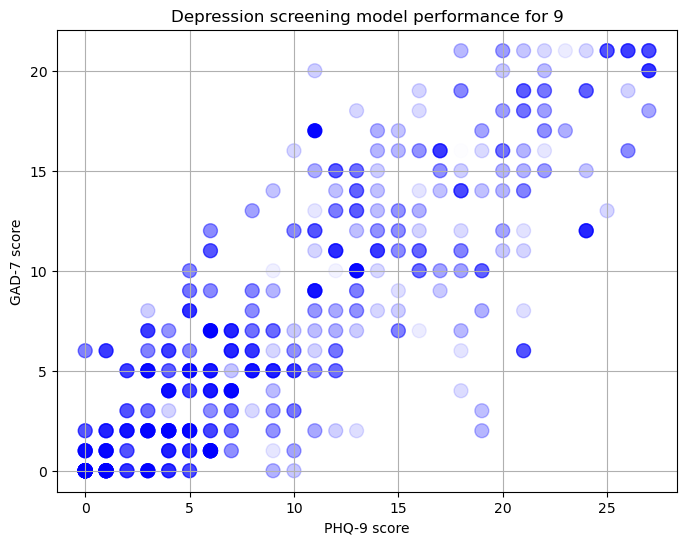

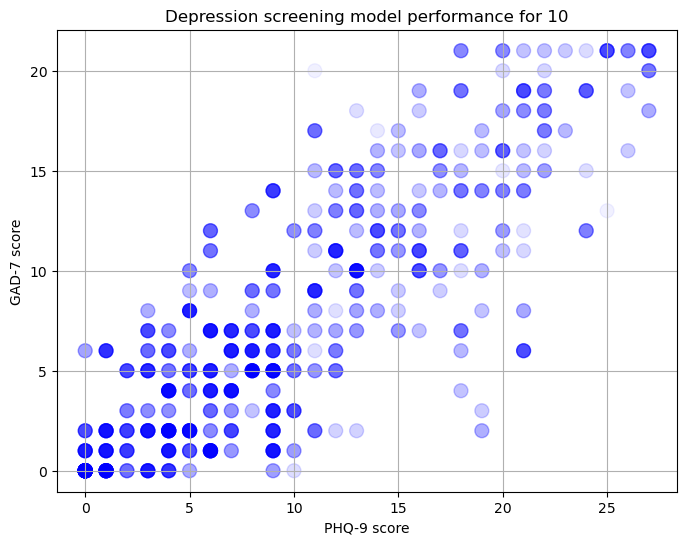

In [16]:
error_scatter_plots(original_data, "phq9" ,"default")

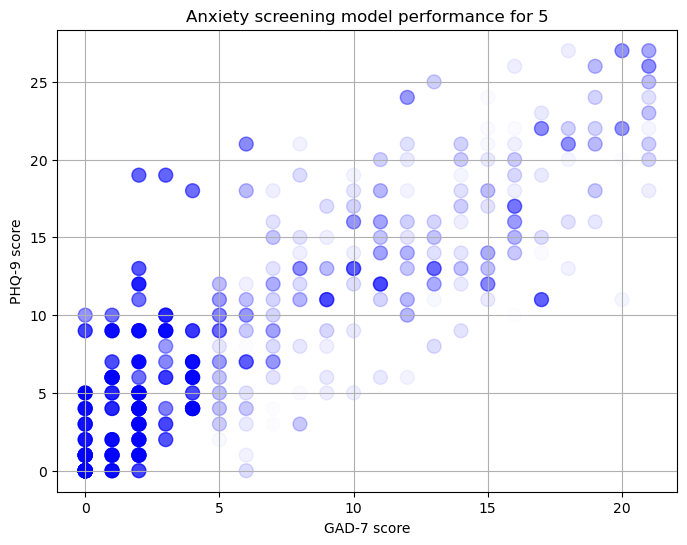

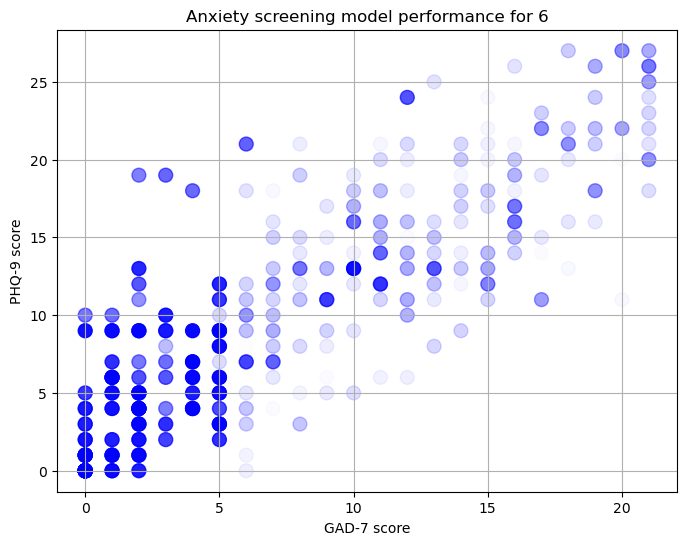

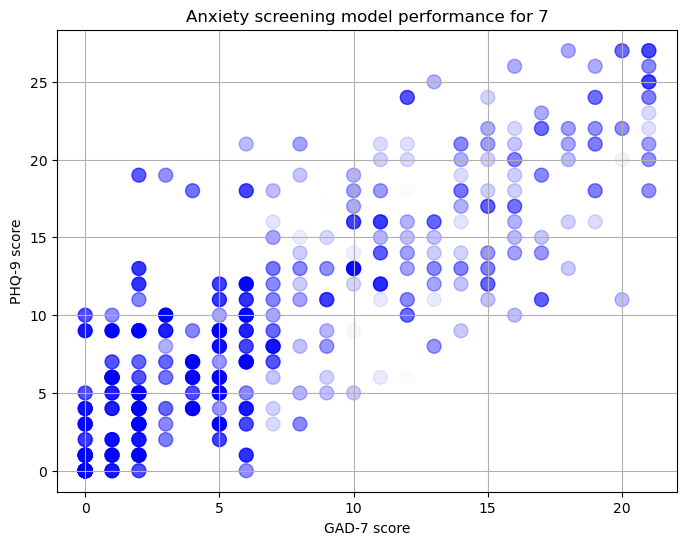

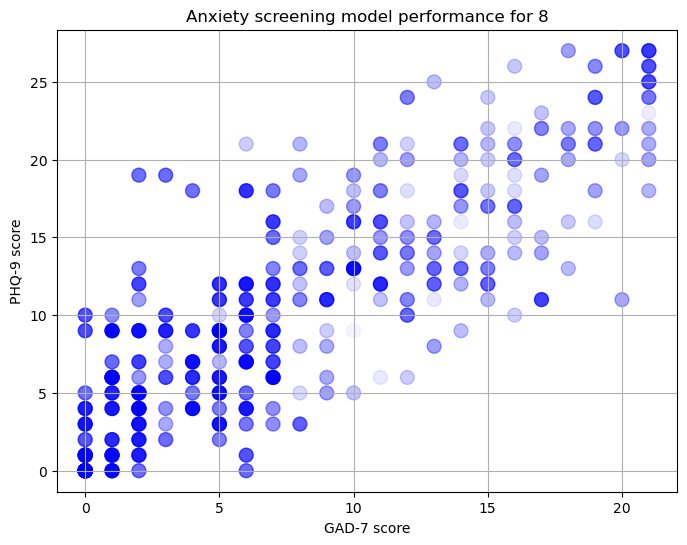

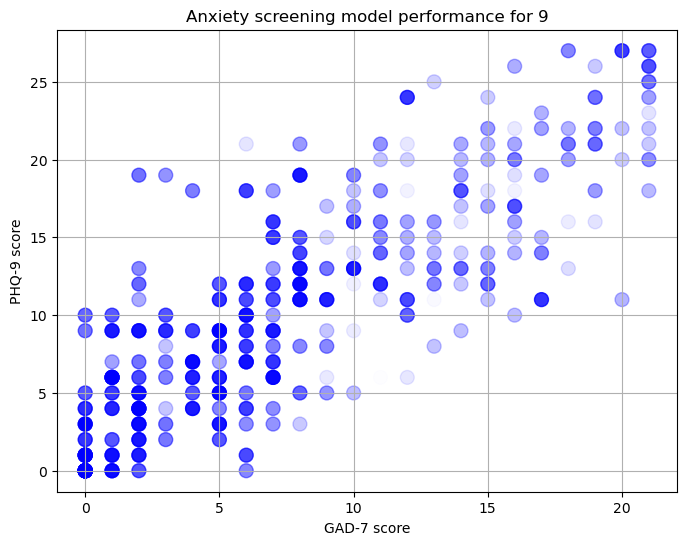

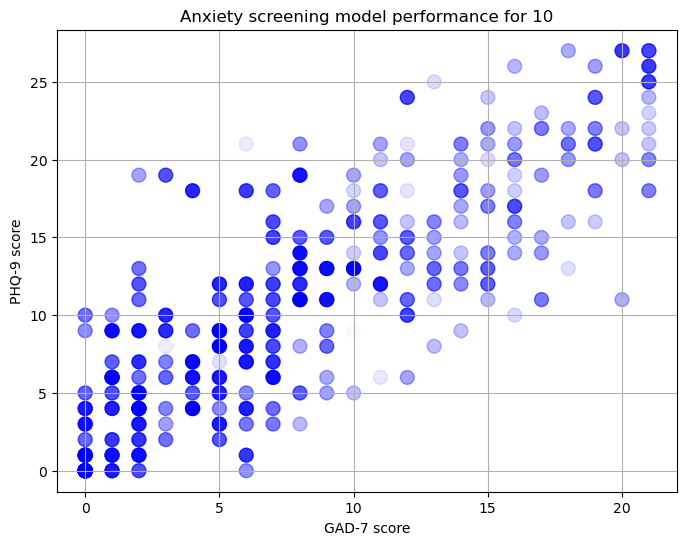

In [17]:
error_scatter_plots(original_data, "gad7" ,"gpt")

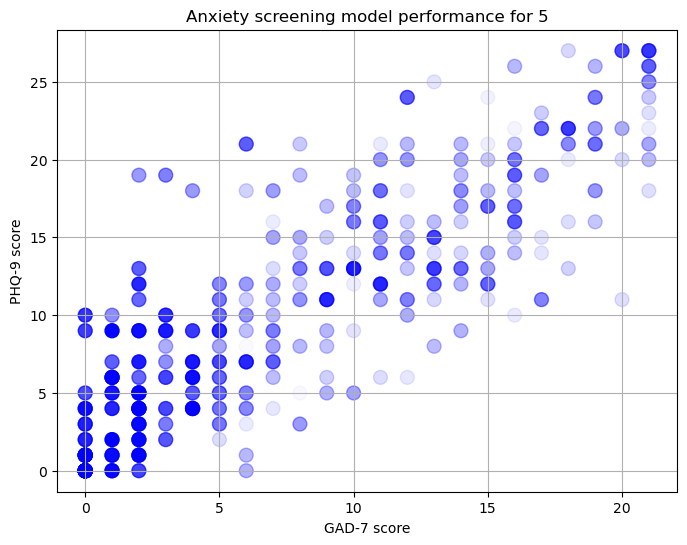

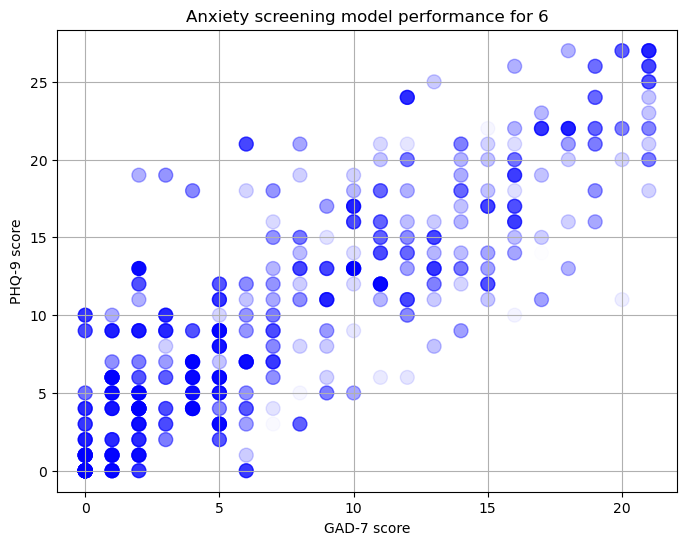

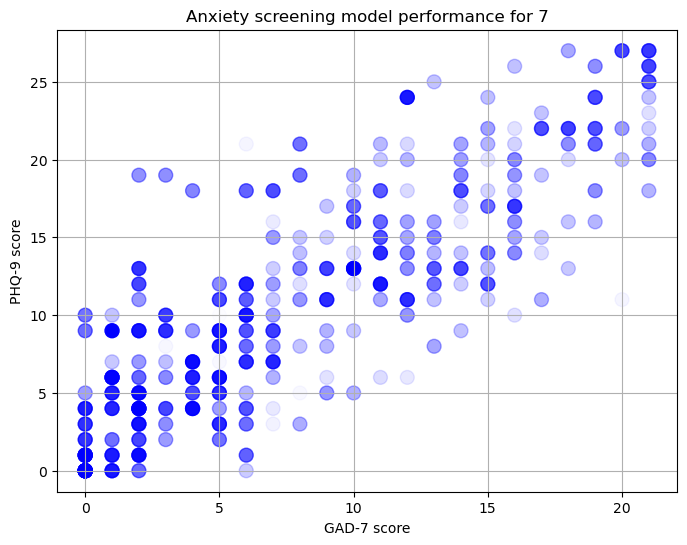

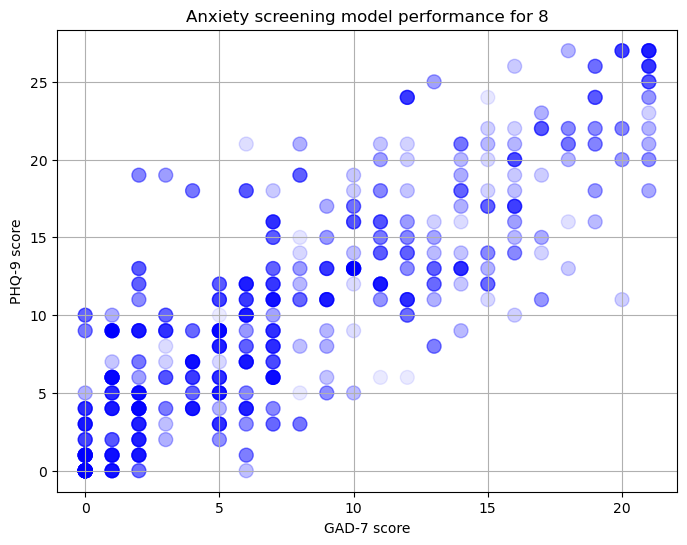

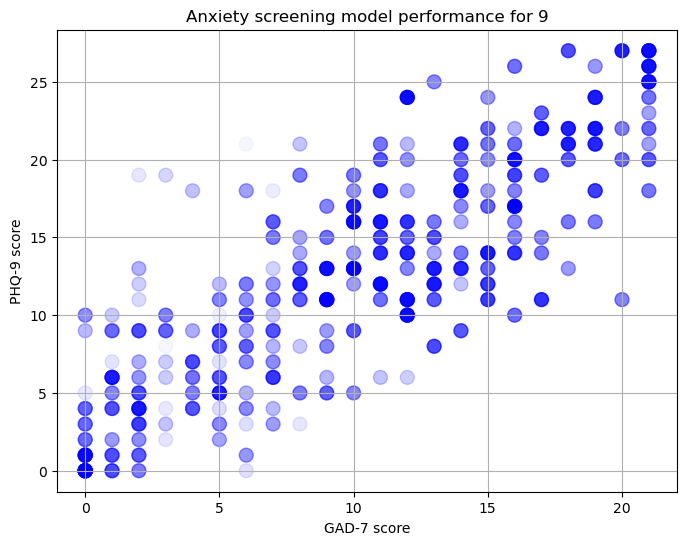

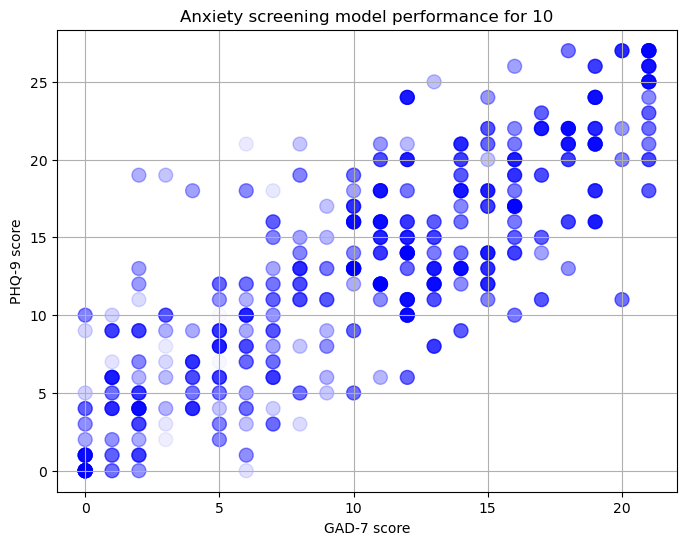

In [18]:
error_scatter_plots(original_data, "gad7" ,"default")